In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind
df = pd.read_excel("FEV-data-Excel.xlsx")
df.head()

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


**Task 1: A customer has a budget of 350,000 PLN and wants an EV with a minimum range of 400 km.**

a) Your task is to filter out EVs that meet these criteria.

b) Group them by the manufacturer (Make).

c) Calculate the average battery capacity for each manufacturer.

In [2]:
#Task 1.a) Apply filters for budget and range
filtered_df = df[
                (df['Minimal price (gross) [PLN]'] <= 350000) &
                (df['Range (WLTP) [km]'] >= 400)]
filtered_df.head()


,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
8,BMW iX3,BMW,iX3,282900,286,400,disc (front + rear),2WD (rear),80.0,460,...,2725.0,540.0,5,5,19,180,510.0,6.8,150,18.80
15,Hyundai Kona electric 64kWh,Hyundai,Kona electric 64kWh,178400,204,395,disc (front + rear),2WD (front),64.0,449,...,2170.0,485.0,5,5,17,167,332.0,7.6,100,15.40
18,Kia e-Niro 64kWh,Kia,e-Niro 64kWh,167990,204,395,disc (front + rear),2WD (front),64.0,455,...,2230.0,493.0,5,5,17,167,451.0,7.8,100,15.90
20,Kia e-Soul 64kWh,Kia,e-Soul 64kWh,160990,204,395,disc (front + rear),2WD (front),64.0,452,...,1682.0,498.0,5,5,17,167,315.0,7.9,100,15.70


In [3]:
#Task 1.b) Group by 'Make' and count models that meet the criteria
grouped_by_make = filtered_df.groupby('Make')
grouped_by_make.size().reset_index(name='EV Count')



,Make,EV Count
0,Audi,1
1,BMW,1
2,Hyundai,1
3,Kia,2
4,Mercedes-Benz,1
5,Tesla,3
6,Volkswagen,3


In [4]:
# Task 1.c) Calculate the average battery capacity for each manufacturer
average_battery_capacity = grouped_by_make['Battery capacity [kWh]'].mean().reset_index(name='Average Battery Capacity [kWh]')
display(average_battery_capacity)

,Make,Average Battery Capacity [kWh]
0,Audi,95.000000
1,BMW,80.000000
2,Hyundai,64.000000
3,Kia,64.000000
4,Mercedes-Benz,80.000000
5,Tesla,68.000000
6,Volkswagen,70.666667


Task 2: You suspect some EVs have unusually high or low energy consumption.

Find the outliers in the mean - Energy consumption [kWh/100 km] column.

In [5]:
energy_consumption = df["mean - Energy consumption [kWh/100 km]"]

Q1 = energy_consumption.quantile(0.25)
Q3 = energy_consumption.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(energy_consumption < lower_bound) | (energy_consumption >upper_bound)]
# Display results
print("Energy Consumption Statistics:\n")
print(f"Q1 (25th percentile): {Q1:.2f} kWh/100 km")
print(f"Q3 (75th percentile): {Q3:.2f} kWh/100 km")
print(f"IQR: {IQR:.2f} kWh/100 km\n")
print(f"Lower bound: {lower_bound:.2f} kWh/100 km")
print(f"Upper bound: {upper_bound:.2f} kWh/100 km")
print(f"\nFound {len(outliers)} outliers in mean - Energy consumption [kWh/100km]:")
outliers[['Car full name', 'Make', 'mean - Energy consumption [kWh/100 km]']].sort_values('mean - Energy consumption [kWh/100 km]')

Energy Consumption Statistics:

Q1 (25th percentile): 15.60 kWh/100 km
Q3 (75th percentile): 23.50 kWh/100 km
IQR: 7.90 kWh/100 km

Lower bound: 3.75 kWh/100 km
Upper bound: 35.35 kWh/100 km

Found 0 outliers in mean - Energy consumption [kWh/100km]:


,Car full name,Make,mean - Energy consumption [kWh/100 km]


**Task 3: Your manager wants to know if there's a strong relationship between battery capacity and range.**

a) Create a suitable plot to visualize.

b) Highlight any insights.

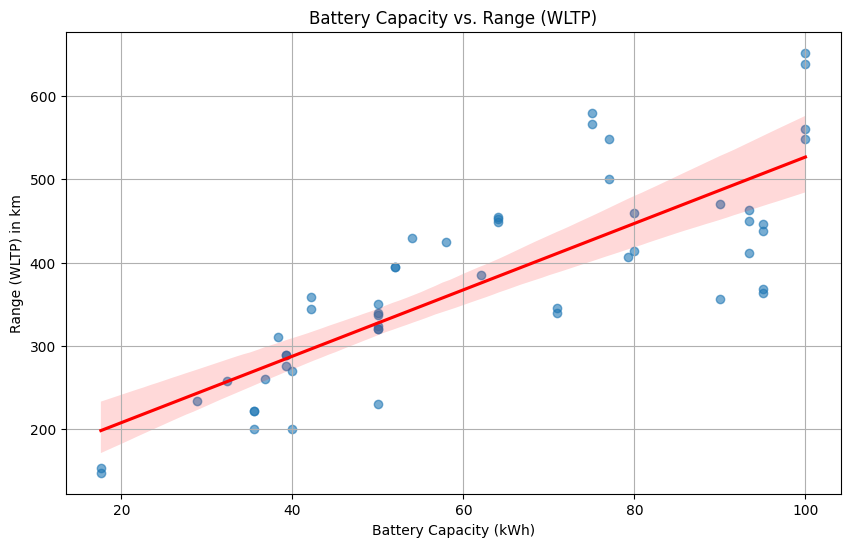

In [6]:


plt.figure(figsize=(10, 6))
sns.regplot(
    data=df.dropna(subset=['Battery capacity [kWh]', 'Range (WLTP) [km]']),
    x='Battery capacity [kWh]',
    y='Range (WLTP) [km]',
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'}
)
plt.title('Battery Capacity vs. Range (WLTP)')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Range (WLTP) in km')
plt.grid(True)
plt.show()

In [7]:
correlation = df["Battery capacity [kWh]"].corr(df["Range (WLTP) [km]"])
print(f"\nCorrelation between Battery Capacity and Range: {correlation:.2f}")


Correlation between Battery Capacity and Range: 0.81


**Task 4:** Build an EV recommendation class. The class should allow users to input their budget, desired range, and battery capacity.
The class should then return the top three EVs
matching their criteria.

In [8]:

df_clean = df[['Car full name',
               'Minimal price (gross) [PLN]',
               'Range (WLTP) [km]',
               'Battery capacity [kWh]']].dropna()

class EVRecommender:
    def __init__(self, data):
        self.data = data

    def recommend(self, budget, min_range, min_battery):
        filtered = self.data[
            (self.data['Minimal price (gross) [PLN]'] <= budget) &
            (self.data['Range (WLTP) [km]'] >= min_range) &
            (self.data['Battery capacity [kWh]'] >= min_battery)
        ]

        top3 = filtered.sort_values(
            by=['Range (WLTP) [km]', 'Battery capacity [kWh]'],
            ascending=[False, False]
        ).head(3)

        return top3[['Car full name',
                     'Minimal price (gross) [PLN]',
                     'Range (WLTP) [km]',
                     'Battery capacity [kWh]']]

recommender = EVRecommender(df_clean)

user_budget = 350000
user_range = 400
user_battery = 60

top_ev_recommendations = recommender.recommend(user_budget, user_range, user_battery)
top_ev_recommendations


,Car full name,Minimal price (gross) [PLN],Range (WLTP) [km],Battery capacity [kWh]
40,Tesla Model 3 Long Range,235490,580,75.0
41,Tesla Model 3 Performance,260490,567,75.0
48,Volkswagen ID.3 Pro S,179990,549,77.0


**Task 5: Inferential Statistics – Hypothesis Testing: Test whether there is a significant difference in the average Engine power [KM] of vehicles manufactured by two leading manufacturers**
i.e. Tesla and Audi. What insights can you draw from the test results?
Recommendations and Conclusion: Provide actionable insights based on your analysis.
(Conduct a two sample t-test using ttest_ind from scipy.stats module)

In [9]:

tesla_power = df[df['Make'] == 'Tesla']['Engine power [KM]'].dropna()
audi_power = df[df['Make'] == 'Audi']['Engine power [KM]'].dropna()
tesla_mean = tesla_power.mean()
audi_mean = audi_power.mean()
tesla_std = tesla_power.std()
audi_std = audi_power.std()

print(f"------------------------------")
print(f'Tesla vehicles: {len(tesla_power)}')
print(f"------------------------------")
print("Tesla Engine Power Stats:")
print(f"Mean: {tesla_mean:.2f} KM")
print(f"Std Dev: {tesla_std:.2f} KM\n")
print(f"------------------------------")
print(f'Audi vehicles: {len(audi_power)}')
print(f"------------------------------")
print("Audi Engine Power Stats:")
print(f"Mean: {audi_mean:.2f} KM")
print(f"Std Dev: {audi_std:.2f} KM\n")
print(f"------------------------------")



t_stat, p_value = ttest_ind(tesla_power, audi_power, equal_var=False)  # Welch's t-test

print(f"\nT-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}\n")

significance_level = 0.05
if p_value < significance_level:
  print("Reject the null hypothesis: There is a significant difference in engine power between Tesla and Audi.")
else:
  print("Fail to reject the null hypothesis: No significant difference in engine power between Tesla and Audi.")

------------------------------
Tesla vehicles: 7
------------------------------
Tesla Engine Power Stats:
Mean: 533.00 KM
Std Dev: 184.66 KM

------------------------------
Audi vehicles: 6
------------------------------
Audi Engine Power Stats:
Mean: 392.00 KM
Std Dev: 88.51 KM

------------------------------

T-statistic: 1.7940
P-value: 0.1068

Fail to reject the null hypothesis: No significant difference in engine power between Tesla and Audi.


------------------------------------------------**Task 6) Project Video Explanation**------------------------------------------------

https://drive.google.com/file/d/1Z73gcg_2jq3GOY3F6CMHTFGYtd9tDF-A/view?usp=sharing